<img src="https://miro.medium.com/v2/resize:fit:920/1*CS-OYdiRLCBMBiOpEURy0g.png" width="700" height="300">


<div style="border-radius:10px; padding: 12px; background-color: #faf5ed; font-size:100%; text-align:left">

<h2 align="left"><font color=#fc7651>Introduction</font></h2>
    
The goal of this project is to develop a robust email spam detection system using machine
learning techniques. By analyzing the content and characteristics of emails, the system should
be able to accurately classify incoming emails as either spam or legitimate (ham).


**We will be exploring below models:**
- Multi-Layer Perceptron (MLP) classifier
- Multinomial Naive Bayes algorithm
- Bernoulli Naive Bayes algorithm
    
**Data Dictionary:**
The data consist of two columns, 
1. v2 which is the actual email
2. v1 Label of whether the email is Spam or Ham(not spam)

## <b><span style='color:#28838a'> | </span><span style='color:#fc7651'> Importing the Libraries & Loading data </span></b>

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
import nltk #Natural Language Toolkit
#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [3]:
#Load data & print samples
df = pd.read_csv('spam_dataset.csv',encoding='latin-1')
df.head()

,label,text
0,spam,naturally irresistible your corporate identity...
1,spam,the stock trading gunslinger fanny is merrill ...
2,spam,unbelievable new homes made easy im wanting to...
3,spam,4 color printing special request additional in...
4,spam,do not have money get software cds from here s...


In [8]:

# Renaming v1 & v2 as Category & Text
df=df.rename(columns={"label":"Category","text":"Text"})

#Sample post modifications
df.head()

,Category,Text
0,spam,naturally irresistible your corporate identity...
1,spam,the stock trading gunslinger fanny is merrill ...
2,spam,unbelievable new homes made easy im wanting to...
3,spam,4 color printing special request additional in...
4,spam,do not have money get software cds from here s...


## <b><span style='color:#28838a'> | </span><span style='color:#fc7651'> Exploratory Data Analysis</span></b>

In [9]:
#Let's check the length of the dataset
print(" Total number of rows in the dataset are", len(df))

 Total number of rows in the dataset are 20348


Label distribution (%): Category
ham     70.5
spam    29.5
Name: proportion, dtype: float64


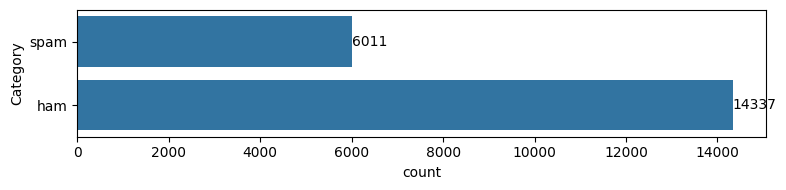

In [10]:
#Let's check the distribution of the Ham & Spam

print('Label distribution (%):', round(df.Category.value_counts(normalize=True),3)*100)
plt.figure(figsize=(8,2))
ax=sns.countplot(data=df, y='Category')
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()


In [11]:
#Descriptive Summary of the dataset
df.describe()

,Category,Text
count,20348,20348
unique,2,20334
top,ham,SPAM ALERT ð User: Username: @DillyBu...
freq,14337,8


<div style="border-radius:10px; padding: 10px; background-color: #faf5ed; font-size:100%; text-align:left">

- The dataset has **4825 emails (86.6%)** labled as Ham while **747 (13.4%)** labaled as Spam.
- "ham" is the predominant category.
- The dataset contains 5,169 unique texts.
- The most frequent text being "Sorry, I'll call later," occurring 30 times.

In [12]:
#Let's create a column to check of each text & plot a histogram to check the distirbution
df['Length']=df['Text'].apply(len)
display(df.head())

#distribution of the data
import plotly.express as px
fig = px.histogram(df, x='Length', marginal='rug',
                   title='Histogram of Text Length')
fig.update_layout(
    xaxis_title='Length',
    yaxis_title='Frequency',
    showlegend=True)

,Category,Text,Length
0,spam,naturally irresistible your corporate identity...,769
1,spam,the stock trading gunslinger fanny is merrill ...,585
2,spam,unbelievable new homes made easy im wanting to...,416
3,spam,4 color printing special request additional in...,436
4,spam,do not have money get software cds from here s...,199


ModuleNotFoundError: No module named 'plotly'

In [8]:
#Lets check the distribution against categories
import plotly.express as px
fig = px.histogram(df, x='Length', color='Category', marginal='rug',
                   title='Histogram of Text Length by Category')
fig.update_layout(
    xaxis_title='Length',
    yaxis_title='Frequency',
    showlegend=True)

In [13]:
#Let's Label the data as 0 & 1 i.e. Spam as 1 & Ham as 0
df.loc[:,'Category']=df.Category.map({'ham':0, 'spam':1})
df['Category'] = df['Category'].astype(int)
df.head()

,Category,Text,Length
0,1,naturally irresistible your corporate identity...,769
1,1,the stock trading gunslinger fanny is merrill ...,585
2,1,unbelievable new homes made easy im wanting to...,416
3,1,4 color printing special request additional in...,436
4,1,do not have money get software cds from here s...,199


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20348 entries, 0 to 20347
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  20348 non-null  int32 
 1   Text      20348 non-null  object
 2   Length    20348 non-null  int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 397.6+ KB


## <b><span style='color:#28838a'> | </span><span style='color:#fc7651'> Bag of Words </span></b>

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

count = CountVectorizer()
text = count.fit_transform(df['Text'])
#Train & test split
x_train, x_test, y_train, y_test = train_test_split(text, df['Category'], test_size=0.30, random_state=100)
text

<20348x54810 sparse matrix of type '<class 'numpy.int64'>'
	with 779297 stored elements in Compressed Sparse Row format>

In [16]:
#Let's print the dimentions of the train & test dataset
display('X-Train :', x_train.shape)
display('X-Test :',x_test.shape)
display('Y-Train :',y_train.shape)
display('X-Test :',y_test.shape)

'X-Train :'

(14243, 54810)

'X-Test :'

(6105, 54810)

'Y-Train :'

(14243,)

'X-Test :'

(6105,)

## <b><span style='color:#28838a'> | </span><span style='color:#fc7651'> Training the ML models </span></b>

### <b><span style='color:#fc7651'> | </span><span style='color:#28838a'> Neural Network </span></b>

In [17]:
%%time
from sklearn.neural_network import MLPClassifier

mlp_classifier_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000) 
mlp_classifier_model.fit(x_train, y_train)  

prediction = mlp_classifier_model.predict(x_test)

# Calculate and print classification metrics
print("MLP Classifier")
print("Accuracy score: {:.2f}".format(accuracy_score(y_test, prediction)))
print("Precision score: {:.2f}".format(precision_score(y_test, prediction)))
print("Recall score: {:.2f}".format(recall_score(y_test, prediction)))
print("F1 score: {:.2f}".format(f1_score(y_test, prediction)))


MLP Classifier
Accuracy score: 0.94
Precision score: 0.93
Recall score: 0.88
F1 score: 0.90
CPU times: total: 4min 40s
Wall time: 4min 24s


### <b><span style='color:#fc7651'> | </span><span style='color:#28838a'> Multinomial Naive Bayes </span></b>

In [18]:
%%time
# Multinomial Naive Bayes model 
from sklearn.naive_bayes import MultinomialNB

multinomial_nb_model = MultinomialNB()
multinomial_nb_model.fit(x_train, y_train)  # Train the model

prediction = multinomial_nb_model.predict(x_test)

print("Multinomial NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

Multinomial NB
Accuracy score: 0.9035217035217035
Precision score: 0.7909423604757548
Recall score: 0.9290703922622247
F1 score: 0.8544600938967136
CPU times: total: 31.2 ms
Wall time: 22 ms


### <b><span style='color:#fc7651'> | </span><span style='color:#28838a'> Bernoulli Naive Bayes </span></b>

In [19]:
%%time
# Bernoulli Naive Bayes model
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

bernoulli_nb_model = BernoulliNB()
bernoulli_nb_model.fit(x_train, y_train)

prediction = bernoulli_nb_model.predict(x_test)

#Evaluation
print("Bernoulli NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

Bernoulli NB
Accuracy score: 0.9364455364455364
Precision score: 0.940754039497307
Recall score: 0.8447071466953251
F1 score: 0.8901472253680632
CPU times: total: 31.2 ms
Wall time: 29 ms


### <b><span style='color:#fc7651'> | </span><span style='color:#28838a'> Confusion Matrix </span></b>

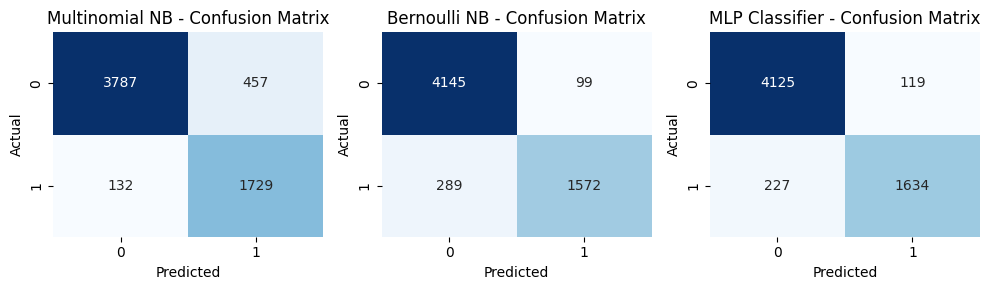

In [20]:
#Confusion Matrix Subplot for 3 Models
from sklearn.metrics import confusion_matrix
models = [("Multinomial NB", multinomial_nb_model), ("Bernoulli NB", bernoulli_nb_model),("MLP Classifier", mlp_classifier_model) ]

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i, (model_name, model) in enumerate(models):
    prediction = model.predict(x_test)
    cm = confusion_matrix(y_test, prediction)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[i])
    axes[i].set_title(f"{model_name} - Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
plt.tight_layout()
plt.show()


### <b><span style='color:#fc7651'> | </span><span style='color:#28838a'> Metric Comparison Heatmap </span></b>

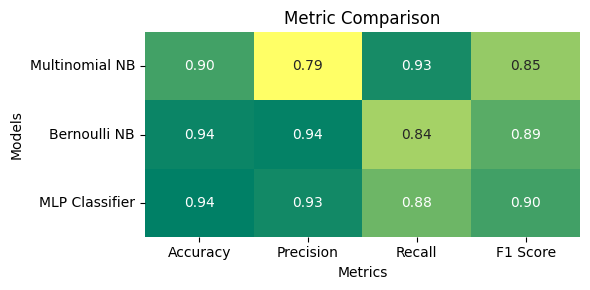

In [21]:
#Metric Comparison Heatmap
metric_data = []
for model_name, model in models:
    prediction = model.predict(x_test)
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    metric_data.append([accuracy, precision, recall, f1])
metric_labels = ["Accuracy", "Precision", "Recall", "F1 Score"]
#heatmap for metric comparison
plt.figure(figsize=(6, 3))
sns.heatmap(metric_data, annot=True, fmt=".2f", cbar=False, cmap="summer_r", xticklabels=metric_labels, yticklabels=[model_name for model_name, _ in models])
plt.title("Metric Comparison")
plt.yticks(rotation=0)
plt.xlabel("Metrics")
plt.ylabel("Models")
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 10px; background-color: #faf5ed; font-size:100%; text-align:left">

<h3 align="left"><font color=#fa592d>Conclusion</font></h3>

* All three models perform exceptionally well, with high accuracy scores.
* MLP Classifier leads in accuracy of 99%, followed by Bernoulli NB (98.39%), and Multinomial NB (98.15%)
* Bernoulli NB achieves perfect precision (100%), indicating it has predicated correctly all the time.
* MLP Classifier excels in F1 score of 94%
* MLP Classifier has slightly lower recall 90% but compensates with higher precision.

> **The final choice of model always depend upon what is needed to be filtered & hence model can be adjusted to improve recall or precision.**
> - If you want to  minimize the number of false negatives i.e spam messages don't end up in the user's inbox you would like to have high Recall.
> - On the other hand with high precision(false negatives), one might miss important messages because the model is overly cautious in classifying messages as spam.

##### <b><span style='color:#28838a'> ^ </span><span style='color:#fc7651 '> Please Upvote if you find this notebook helpful </span></b>

Acknowledgememnt: 

[Email Spam Classifier Using Naive bayes](https://www.kaggle.com/code/shantanudhakadd/email-spam-classifier-using-naive-bayes)

_Image source- Internet_